In [8]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

In [9]:
races = ['Total!!Population of one race!!White alone',
           'Total!!Population of one race!!Black or African American alone',
           'Total!!Population of one race!!American Indian and Alaska Native alone',
           'Total!!Population of one race!!Asian alone',
           'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander alone',
           'Total!!Population of one race!!Some Other Race alone',
           'Total!!Two or More Races!!Population of two races!!White; Black or African American',
           'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!White; Asian',
           'Total!!Two or More Races!!Population of two races!!White; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!White; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Asian',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Asian; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Asian',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of six races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']           

In [49]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']

#print('county, ', 'minority races (including empty), ', 'minority races (not including empty), ','number of individuals who are minorities')


def get_finalvals(counties, threshold):
    final_values = []
    final_values3 = []

    for county in counties:
        df = pd.read_csv (r'../homemade_data/'+county+'.csv')
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        df = df.loc[:, ~df.columns.str.contains('SwapVal')]


        for index, row in df.iterrows():
            d = row['race']
            h = row['hispanic']
            if d in races and h==1:
                df.at[index, 'race'] = races.index(d)
            elif d in races and h==0:
                df.at[index, 'race'] = races.index(d)+63

        labels_all = []
        vals_all = []

        for key, value in df.iteritems():
            if(key == 'race'):
                labels, values = zip(*Counter(value).items())
                labels=list(labels)
                values = list(values)
                for i in range(0, 126):
                    if i not in labels:
                        labels_all.append(i)
                        vals_all.append(0)
                    elif i in labels:
                        pos = labels.index(i)
                        labels_all.append(i)
                        vals_all.append(values[pos])
        labels_all = np.arange(0,126,1)


        #get percent race occurrences of each race in original data (only calculate for minorites >5%)
        total = 0
        for e in range(0, len(vals_all)):
            total = total + vals_all[e]
        final = []
        final2 = []
        sad = []
        for i in range(0,len(vals_all)):
            if vals_all[i]/total <= threshold:
                final.append(i)
                if(vals_all[i] !=0):
                    final2.append(i)
                sad.append(vals_all[i])

        final_values.append(len(final2))
        final_values3.append(sum(sad))
        #print(county, len(final), len(final2),sum(sad))
        
    return final_values, final_values3

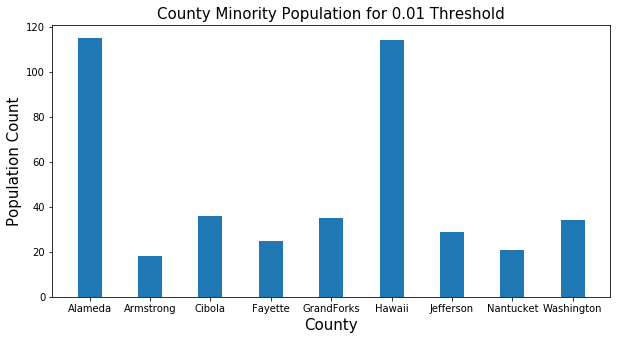

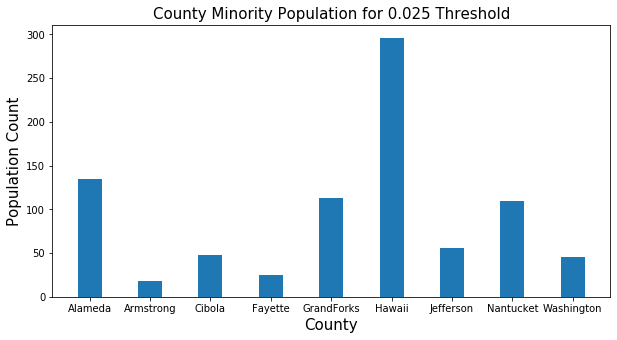

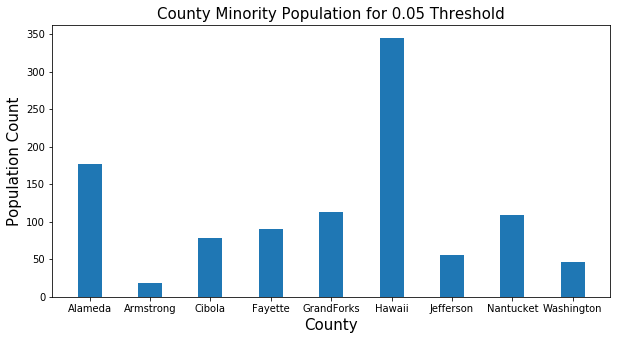

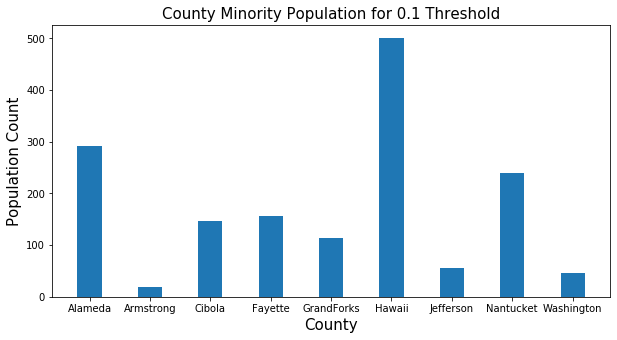

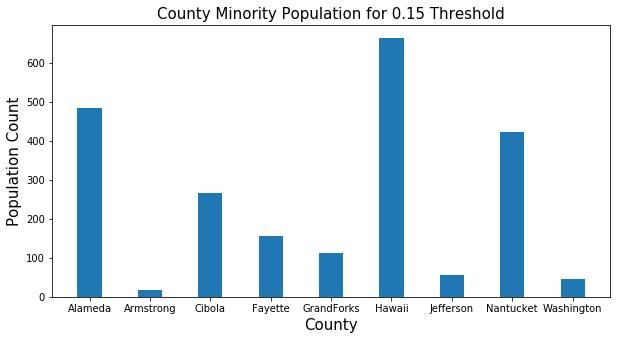

In [50]:
import numpy as np
import matplotlib.pyplot as plt

thresholds = [.01, .025, .05, .1, .15]
for threshold in thresholds:
    final_values, final_values3 = get_finalvals(counties, threshold)
    fig = plt.figure(figsize = (10, 5))
    plt.bar(counties, final_values3, width = 0.4)
    plt.title('County Minority Population for '+str(threshold)+ ' Threshold', size='15')
    plt.xlabel('County', size='15')
    plt.ylabel('Population Count', size='15')

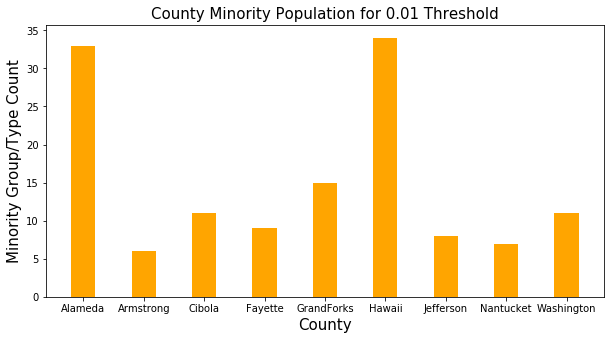

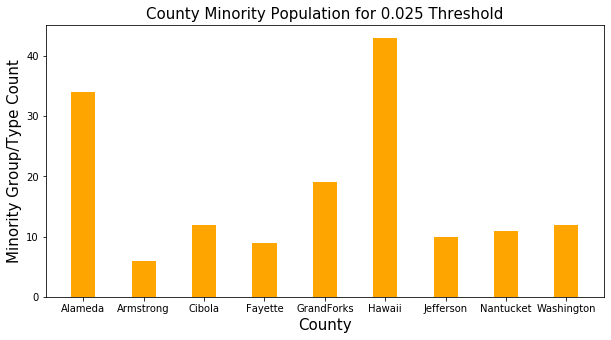

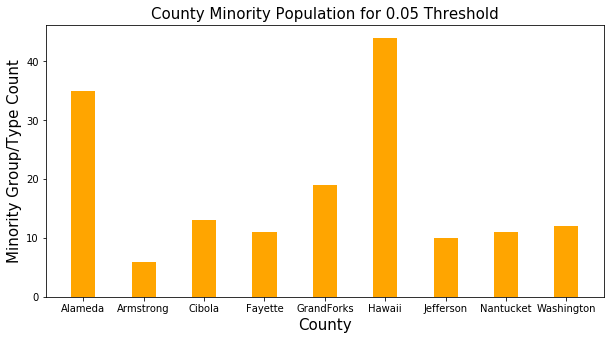

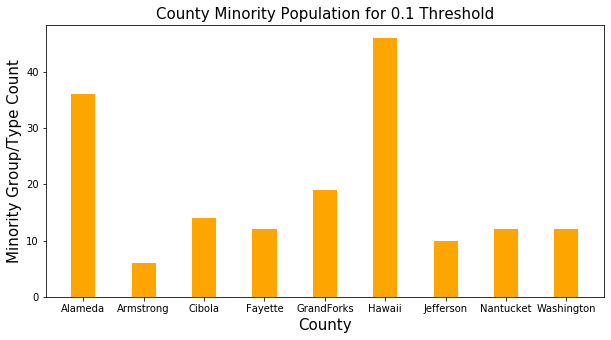

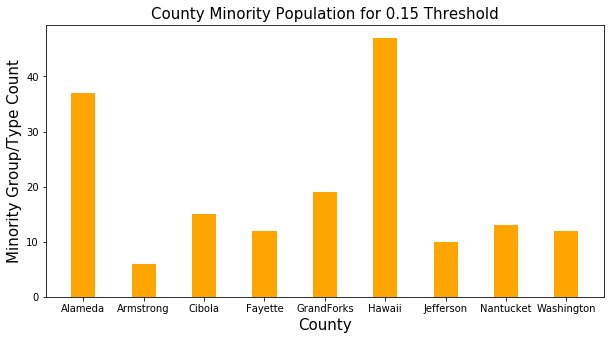

In [51]:
import numpy as np
import matplotlib.pyplot as plt

thresholds = [.01, .025, .05, .1, .15]
for threshold in thresholds:
    final_values, final_values3 = get_finalvals(counties, threshold)
    fig = plt.figure(figsize = (10, 5))
    plt.bar(counties, final_values, width = 0.4, color ='orange')
    plt.title('County Minority Population for '+str(threshold)+ ' Threshold', size='15')
    plt.xlabel('County', size='15')
    plt.ylabel('Minority Group/Type Count', size='15')